In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

In [3]:
try:
    mnist = pd.read_pickle('fetch_openml.pkcache')
except:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
finally:
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

In [4]:
type(mnist)

sklearn.utils.Bunch

In [5]:
mnist['data'][0].shape[0]**(1/2)

28.0

In [6]:
X = datasets.load_digits()['data']

In [7]:
y = datasets.load_digits()['target']

In [8]:
import matplotlib.pyplot as plt

In [9]:
mnist['target'][-15:]

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6], dtype=int8)

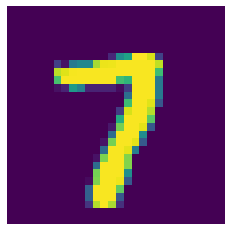

In [10]:
plt.imshow(mnist['data'][-10].reshape(28,28))
plt.axis('off')
plt.show()

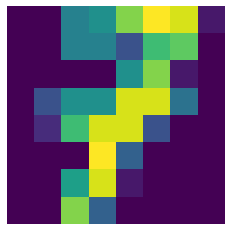

In [11]:
plt.imshow(X[7].reshape(8,8))
plt.axis('off')
plt.show()

In [12]:
X.shape

(1797, 64)

In [13]:
X.shape[0] * 6/7

1540.2857142857142

(array([119., 121., 117., 121., 120., 123., 120., 118., 119., 122.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

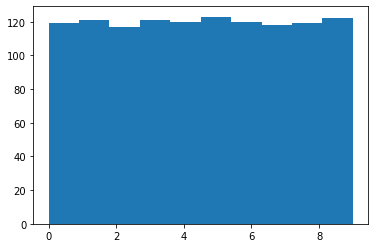

In [14]:
plt.hist(y[:1200])

(array([59., 61., 60., 62., 61., 59., 61., 61., 55., 58.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

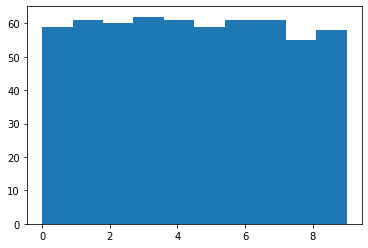

In [15]:
plt.hist(y[1200:])

In [16]:
nova_ordem = np.random.permutation(X.shape[0])

In [17]:
X[nova_ordem]

array([[ 0.,  0., 12., ..., 15.,  6.,  0.],
       [ 0.,  0.,  4., ..., 11.,  1.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  7., ...,  0.,  0.,  0.],
       [ 0.,  0.,  8., ...,  5.,  0.,  0.],
       [ 0.,  0., 14., ...,  5.,  0.,  0.]])

In [18]:
y[nova_ordem]

array([9, 8, 9, ..., 5, 3, 5])

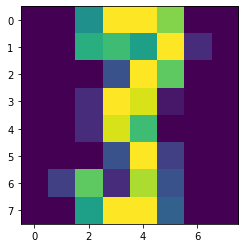

In [19]:
plt.imshow(X[nova_ordem][-2].reshape(8,8))

In [20]:
n_test = int(X.shape[0] * .15)
n_train = X.shape[0] - n_test

In [21]:
n_test

269

In [22]:
n_train

1528

In [23]:
X.shape[0]

1797

In [24]:
X_train, X_test, y_train, y_test = X[:n_train], X[n_train:], y[:n_train], y[n_train:]

In [25]:
X_train.shape

(1528, 64)

In [26]:
y_test.shape

(269,)

In [27]:
# Criar um classificador binario
y == 5

array([False, False, False, ..., False, False, False])

In [28]:
y_train, y_test =  y_train == 5, y_test == 5

In [29]:
from sklearn.linear_model import SGDClassifier

In [30]:
# primeiro treino
sgd_clf = SGDClassifier(random_state=42)

In [31]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [32]:
sgd_clf.predict(X_train[0].reshape(1, -1))

array([False])

In [33]:
y_train[0]

False

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.98039216, 0.98035363, 0.98428291])

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

In [37]:
class Never5Classifier(BaseEstimator, ):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [38]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.89803922, 0.89980354, 0.89980354])

In [39]:
from sklearn.model_selection import cross_val_predict

In [40]:
cross_val_predict(never_5_clf, X_train, y_train, cv=3)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_train, cross_val_predict(sgd_clf, X_train, y_train, cv=3))

array([[1360,   14],
       [  14,  140]])

In [43]:
y_train.shape[0] - y_train.sum()

1374

In [44]:
y_train.sum()

154

In [45]:
confusion_matrix(y_train, cross_val_predict(never_5_clf, X_train, y_train, cv=3))

array([[1374,    0],
       [ 154,    0]])

In [46]:
from sklearn.metrics import plot_confusion_matrix

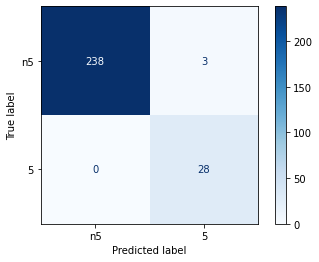

In [47]:
plot_confusion_matrix(sgd_clf, X_test, y_test,
                      display_labels=['n5', '5'],
                      cmap=plt.cm.Blues)

In [48]:
# linha real
# coluna prevista
# imblearn
# classification report

In [49]:
# Desafio: Criar um algo que traga os falsos positivos

In [50]:
cross_val_predict(sgd_clf, X_test, y_test) ^ y_test 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [51]:
diferentes = np.where( cross_val_predict(sgd_clf, X_test, y_test) ^ y_test  == True)

In [52]:
confusion_matrix(cross_val_predict(sgd_clf, X_test, y_test), y_test)

array([[240,   2],
       [  1,  26]])

In [53]:
falso_negativo = []
falso_positivo = []
real = y_test
predito = cross_val_predict(sgd_clf, X_test, y_test)

In [54]:
for i in range(len(y_test)):
    if (real[i] == True) and (predito[i] == False):
        falso_negativo.append(i)
    elif (predito[i] == True) and (real[i] == False):
        falso_positivo.append(i)

In [55]:
falso_negativo

[47, 48]

In [56]:
falso_positivo

[79]

In [57]:
def falsos_positivos_e_negativos(y_real, y_predito):
    
    # verificar que o y_real e o y_predito tem o mesmo tamanho
    # verificar que os valores dentro da array sao booleanos
    # 
    
    falso_negativo = []
    falso_positivo = []
    for i in range(len(y_real)):
        if (y_real[i] == True) and (y_predito[i] == False):
            falso_negativo.append(i)
        elif (y_predito[i] == True) and (y_real[i] == False):
            falso_positivo.append(i)
            
    return {'FN': falso_negativo, 'FP': falso_positivo}

In [58]:
%%timeit
falsos_positivos_e_negativos(y_test, cross_val_predict(sgd_clf, X_test, y_test))

47.5 ms ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
np.where(~y_test & cross_val_predict(sgd_clf, X_test, y_test) == True)[0]

array([79])

In [60]:
np.where(y_test & ~cross_val_predict(sgd_clf, X_test, y_test) == True)[0]

array([47, 48])

In [61]:
def falsos_positivos_e_negativos(y_real, y_predito):
    return {'FN': np.where((y_real & ~y_predito) == True)[0], 'FP': np.where((~y_real & y_predito) == True)[0]}

In [62]:
%%timeit
falsos_positivos_e_negativos(y_test, cross_val_predict(sgd_clf, X_test, y_test))

21.7 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


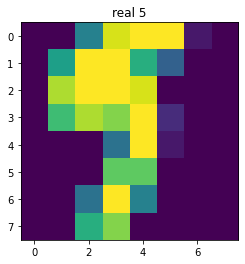

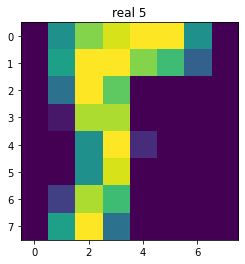

In [63]:
for i in falso_negativo: 
    plt.title(f'real {y[n_train:][i]}')
    plt.imshow(X_test[i].reshape(8,8))
    plt.show()

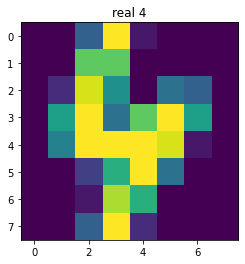

In [64]:
for i in falso_positivo: 
    plt.title(f'real {y[n_train:][i]}')
    plt.imshow(X_test[i].reshape(8,8))
    plt.show()

# Precisão: acurácia das previsoes positivas

precisao = verdadeiro positivo / (verdadeiro positivo + falso positivo)

# Exemplo video

In [65]:
afeta = 0.001
precisao_teste = 0.99 

In [66]:
## teorema de bayes
pessoas = 1000
verdadeiro_positivo = pessoas * afeta
falsos_positivos = pessoas - (pessoas * precisao_teste)
falsos_positivos
conjunto_de_testes = verdadeiro_positivo + falsos_positivos
verdadeiro_positivo / conjunto_de_testes

0.09090909090909091

## Covid

In [67]:
precisao_teste = 0.99 
chance_de_covid = 0.10


In [68]:
pessoas = 1000
verdadeiro_positivo = 10
falsos_positivos = pessoas - (pessoas * precisao_teste)
falsos_positivos
conjunto_de_testes = verdadeiro_positivo + falsos_positivos
verdadeiro_positivo / conjunto_de_testes

0.5

In [69]:
precisao_algo = 0.60
pcte_covid_popu = 0.2

In [70]:
# caio
precisao_teste = precisao_algo
pessoas = 1000
proba_covid = pcte_covid_popu
tem_covid = proba_covid * pessoas
verdadeiro_positivo = tem_covid
verdadeiro_positivo
# da galera que sobrou, aplicar precisao do teste
falso_positivo = (pessoas - verdadeiro_positivo) * (1-precisao_teste)
verdadeiro_positivo / (verdadeiro_positivo + falso_positivo)

0.38461538461538464

In [71]:
# formula video
p_teste_positivo_se_tem_doenca = precisao_algo
p_ter_a_doenca = pcte_covid_popu

p_testar_positivo = (p_ter_a_doenca * p_teste_positivo_se_tem_doenca + (1 - p_ter_a_doenca)  * (1 - p_teste_positivo_se_tem_doenca))
(p_teste_positivo_se_tem_doenca * p_ter_a_doenca) / p_testar_positivo

0.2727272727272727

In [72]:
# formula Gustavo
chance_covid_fato = pcte_covid_popu
populacao = 1000
precisao_teste = precisao_algo
populacao_infectada = populacao * chance_covid_fato
populacao_n_infectada = populacao * (1 - chance_covid_fato)
teste_aplicados_em_quem_nao_tem_covid = populacao_n_infectada * (1 - precisao_teste)
teste_aplicados_em_quem_tem_covid = populacao_infectada * (precisao_teste)
populacao_infectada / (teste_aplicados_em_quem_nao_tem_covid + teste_aplicados_em_quem_tem_covid)

0.45454545454545453

In [73]:
pip install pomegranate

     |████████████████████████████████| 4.5 MB 1.3 MB/s eta 0:00:01
  Created wheel for pomegranate: filename=pomegranate-0.13.5-cp38-cp38-linux_x86_64.whl size=23311339 sha256=947e81500894115fe5383fcef024e92a2e14972cf516db3e7ed96a25e64eb62e
  Stored in directory: /home/jovyan/.cache/pip/wheels/45/93/59/7ddc188374bb5ab696541f21de6a3b4b57f635212b78bc300c
Successfully built pomegranate
Note: you may need to restart the kernel to use updated packages.


# Bayes Theorem

- P(H) = Probabilidade da hipotese ser verdadeira (antes da evidencia)
- P(E|H) = Probabilidade de ver uma evidencia se a hipotese é verdadeira
- P(E) = Probabilidade de ver uma evidencia
- P(H|E) = Probabilidade de uma hipotese ser verdadeira dado um evidencia


In [74]:
farmers = 10
librarians = 200
p_descricao_farmers = .40
p_descricao_librarians = .10

In [75]:
pop = 1000
covid = 200
p_descricao_pop = .20
p_descricao_teste = .99

In [76]:
(0.99 * .2) + (.99)

1.188

In [77]:
from pomegranate import *

# Revocação: acurácia dos verdadeiros positivos

revocação = verdadeiro positivo / (verdadeiro positivo + falso negativo)

In [79]:
X = mnist['data']
y = mnist['target']

In [80]:
y_5 = y == 5 
y_5

array([ True, False, False, ..., False,  True, False])

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
_,_,y_train_raw,_ = train_test_split(X, y, test_size=0.33, random_state=42)

In [83]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train )

In [84]:
y_train.shape

(46900,)

In [85]:
y_train_pred.shape

(46900,)

In [86]:
y_train_5 = y_train

In [87]:
y_train_5.shape

(46900,)

In [88]:
from sklearn.metrics import precision_score, recall_score

In [89]:
y_train_pred

array([ True, False, False, ..., False, False, False])

In [90]:
precision_score(y_train_5, y_train_pred)

0.716521032310506

In [91]:
recall_score(y_train_5, y_train_pred)

0.8383262006657156

In [92]:
from sklearn.metrics import f1_score

In [93]:
# dá peso a valores baixos
# favorece classificadores com precisao e revocacao similares
f1_score(y_train_5, y_train_pred)

0.7726525692998795

In [94]:
y_train_pred

array([ True, False, False, ..., False, False, False])

In [95]:
dicionario_falsos_p_n = falsos_positivos_e_negativos(y_train_5, y_train_pred)

In [96]:
len(dicionario_falsos_p_n['FP'])

1395

In [97]:
len(dicionario_falsos_p_n['FN'])

680

In [98]:
confusion_matrix(y_train_5, y_train_pred)


array([[41299,  1395],
       [  680,  3526]])

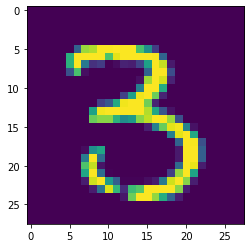

In [99]:
plt.imshow(X_train[dicionario_falsos_p_n['FP'][3]].reshape(28,-1))

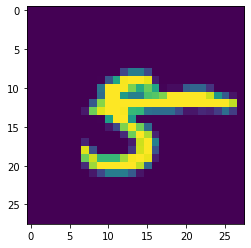

In [100]:
plt.imshow(X_train[dicionario_falsos_p_n['FN'][7]].reshape(28,-1))

In [101]:
# primeiro treino
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [102]:
y_scores = sgd_clf.decision_function(X_train[dicionario_falsos_p_n['FP'][3]].reshape(1,-1))
y_scores

array([-8625.67060259])

In [103]:
y_pred_sgd = sgd_clf.predict(X_train)
dicionario_falsos_p_n = falsos_positivos_e_negativos(y_train_5, y_pred_sgd)

In [104]:
confusion_matrix(y_train_5, y_pred_sgd)

array([[42093,   601],
       [  778,  3428]])

In [105]:
rand = np.random.randint(0, len(dicionario_falsos_p_n['FP']), 1)[0]
rand

96

In [106]:
y_scores = sgd_clf.decision_function(X_train[dicionario_falsos_p_n['FP'][rand]].reshape(1,-1))
y_scores

array([1078.44131414])

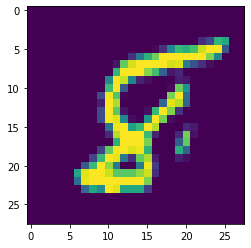

In [107]:
plt.imshow(X_train[dicionario_falsos_p_n['FP'][rand]].reshape(28,-1))

In [108]:
# quando o numero for menor que 4k ele nao é 5
sgd_clf.decision_function(X_train[dicionario_falsos_p_n['FP'][3]].reshape(1,-1))[0] < 4000

True

In [109]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [110]:
from sklearn.metrics import precision_recall_curve

In [111]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [112]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Reacall")
    plt.vlines(15000,ymin=0, ymax=1)
    plt.ylim([0,1])

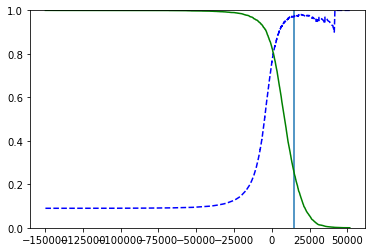

In [113]:
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)

In [114]:
y_predict_precision = y_scores > 15000

In [115]:
confusion_matrix(y_train_5,  y_predict_precision)

array([[42664,    30],
       [ 3170,  1036]])

In [116]:
precision_score(y_train_5, y_predict_precision)

0.9718574108818011

In [117]:
recall_score(y_train_5, y_predict_precision)

0.24631478839752735

In [118]:
# especifidade -> taxa de verdadeiros negativos
# sensibilidade -> revocacao vs 1 - especificidade 

In [119]:
from sklearn.metrics import roc_curve

In [120]:
falso_positivo_ration, verdadeiro_positivo_ration, limite = roc_curve(y_train_5, y_scores)

In [121]:
falso_positivo_ration

array([0.        , 0.        , 0.        , ..., 0.99943786, 0.99943786,
       1.        ])

In [122]:
verdadeiro_positivo_ration

array([0.00000000e+00, 2.37755587e-04, 2.13980029e-03, ...,
       9.99762244e-01, 1.00000000e+00, 1.00000000e+00])

In [123]:
limite

array([  51638.43149544,   51637.43149544,   41794.122853  , ...,
       -147228.56549163, -149797.03214854, -200013.0260963 ])

In [124]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

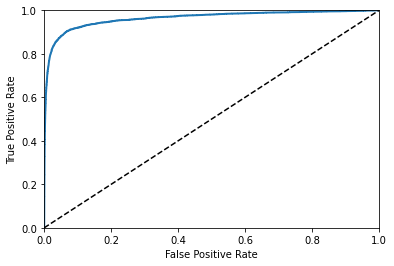

In [125]:
plot_roc_curve(falso_positivo_ration, verdadeiro_positivo_ration)
plt.show()

In [126]:
from sklearn.metrics import roc_auc_score

In [127]:
roc_auc_score(y_train_5, y_scores)

0.963818872186931

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
forest = RandomForestClassifier(random_state=42)

In [145]:
y_probas_forest = cross_val_predict(forest, X_train, y_train_5, method='predict_proba')

In [146]:
y_scores_forest = y_probas_forest[:,1]

In [147]:
fpr_forest, tpr_forest, thresolds_forest = roc_curve(y_train_5, y_scores_forest)

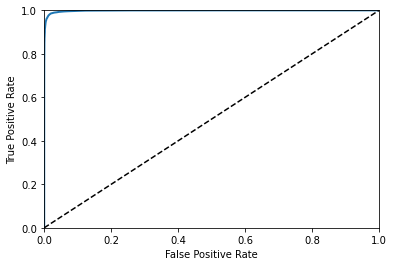

In [148]:
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

In [149]:
y_train_pred_forest = cross_val_predict(forest, X_train, y_train_5)

In [150]:
precision_score(y_train_5, y_train_pred_forest)

0.9899017467248908

In [151]:
recall_score(y_train_5, y_train_pred_forest)

0.862339514978602

In [152]:
roc_auc_score(y_train_5, y_scores_forest)

0.9984123296236245

In [153]:
y_train_raw

array([3, 2, 2, ..., 1, 0, 0], dtype=int8)

In [154]:
sgd_clf.fit(X_train, y_train_raw)

SGDClassifier(random_state=42)

In [155]:
sgd_clf.predict(X_train[0].reshape(1,-1))

array([5], dtype=int8)

In [156]:
some_digit_scores = sgd_clf.decision_function(X_train[0].reshape(1,-1))

In [157]:
some_digit_scores

array([[-37736.4916912 , -37177.54079389, -38218.42457618,
         -1387.1585765 , -29826.4150318 ,    476.48706045,
        -18451.91822557, -41627.2778994 , -13754.85699382,
        -13681.20132077]])

In [164]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [165]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=12))

In [166]:
ova_clf = OneVsRestClassifier(SGDClassifier(random_state=12))

In [162]:
ovo = lambda n: (n*(n-1))/2

In [163]:
ovo(10)

45.0

In [168]:
import time

In [176]:
start = time.time()
ovo_score = cross_val_score(ovo_clf, X_train, y_train_5, cv=3)
end = time.time()
end - start

25.76178240776062

In [177]:
start2 = time.time()
ova_score = cross_val_score(ova_clf, X_train, y_train_5, cv=3)
end2 = time.time()
end2 - start2

22.712538719177246

In [178]:
ovo_score

array([0.96731483, 0.92957206, 0.96059617])

In [179]:
ova_score

array([0.96731483, 0.92957206, 0.96059617])

In [180]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [181]:
conf_mx = confusion_matrix(y_train, y_train_pred)

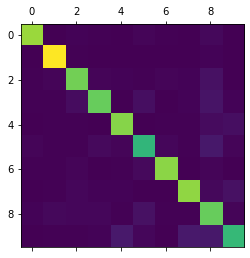

In [184]:
plt.matshow(conf_mx, cmap=plt.cm.viridis)

In [187]:
row_sums = conf_mx.sum(axis=0, keepdims=True)
row_sums = conf_mx / row_sums
row_sums

array([[9.46576537e-01, 0.00000000e+00, 9.12646675e-03, 5.72868928e-03,
        2.08507089e-03, 1.48274186e-02, 5.58035714e-03, 1.03135314e-03,
        2.10355987e-02, 2.44857982e-03],
       [8.72219799e-04, 9.35578331e-01, 8.47457627e-03, 1.83318057e-03,
        1.87656380e-03, 4.61837628e-03, 1.33928571e-03, 2.26897690e-03,
        1.02481122e-02, 2.20372184e-03],
       [8.06803314e-03, 1.22620791e-02, 8.72229465e-01, 1.62694775e-02,
        1.20934112e-02, 5.59066602e-03, 1.58482143e-02, 1.21699670e-02,
        4.04530744e-02, 3.67286974e-03],
       [6.75970345e-03, 4.02635432e-03, 3.58539765e-02, 9.00320807e-01,
        2.91909925e-03, 4.78852698e-02, 3.12500000e-03, 1.17574257e-02,
        4.98022294e-02, 1.27326151e-02],
       [1.74443960e-03, 4.20937042e-03, 8.25727944e-03, 1.60403300e-03,
        8.71559633e-01, 3.64608653e-03, 8.48214286e-03, 6.60066007e-03,
        2.53505933e-02, 4.84818805e-02],
       [1.30832970e-02, 4.20937042e-03, 8.47457627e-03, 3.00183318e-02,
   

In [188]:
conf_mx.sum(axis=0)

array([4586, 5464, 4602, 4364, 4796, 4114, 4480, 4848, 5562, 4084])

In [189]:
conf_mx.sum(axis=1)

array([4636, 5274, 4640, 4758, 4680, 4206, 4582, 4838, 4629, 4657])

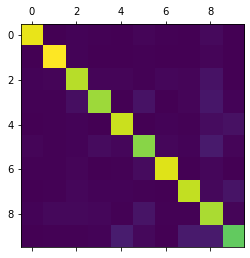

In [192]:
plt.matshow(conf_mx / conf_mx.sum(axis=1))

In [204]:
d_zero = (conf_mx / conf_mx.sum(axis=0))
np.fill_diagonal(d_zero, 0)

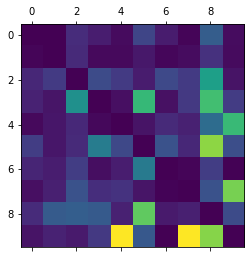

In [206]:
plt.matshow(d_zero)

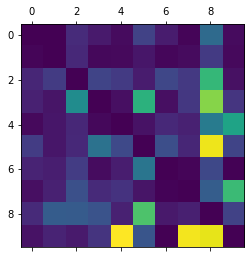

In [211]:
d_zero = (conf_mx / conf_mx.sum(axis=1))
np.fill_diagonal(d_zero, 0)
plt.matshow(d_zero)

In [217]:
conf_mx

array([[4341,    0,   42,   25,   10,   61,   25,    5,  117,   10],
       [   4, 5112,   39,    8,    9,   19,    6,   11,   57,    9],
       [  37,   67, 4014,   71,   58,   23,   71,   59,  225,   15],
       [  31,   22,  165, 3929,   14,  197,   14,   57,  277,   52],
       [   8,   23,   38,    7, 4180,   15,   38,   32,  141,  198],
       [  60,   23,   39,  131,   75, 3359,   81,   38,  330,   70],
       [  34,   32,   60,   11,   27,  120, 4218,    5,   73,    2],
       [  14,   35,   83,   41,   50,   17,    3, 4263,  100,  232],
       [  40,  112,   98,   89,   31,  222,   23,   31, 3916,   67],
       [  17,   38,   24,   52,  342,   81,    1,  347,  326, 3429]])

In [219]:
y_total = pd.Series(y_train).value_counts().sort_index().values

In [224]:
mx_mat5 = np.round(conf_mx / y_total, 2)

In [225]:
mx_mat5

array([[0.94, 0.  , 0.01, 0.01, 0.  , 0.01, 0.01, 0.  , 0.03, 0.  ],
       [0.  , 0.97, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.01, 0.01, 0.87, 0.01, 0.01, 0.01, 0.02, 0.01, 0.05, 0.  ],
       [0.01, 0.  , 0.04, 0.83, 0.  , 0.05, 0.  , 0.01, 0.06, 0.01],
       [0.  , 0.  , 0.01, 0.  , 0.89, 0.  , 0.01, 0.01, 0.03, 0.04],
       [0.01, 0.  , 0.01, 0.03, 0.02, 0.8 , 0.02, 0.01, 0.07, 0.02],
       [0.01, 0.01, 0.01, 0.  , 0.01, 0.03, 0.92, 0.  , 0.02, 0.  ],
       [0.  , 0.01, 0.02, 0.01, 0.01, 0.  , 0.  , 0.88, 0.02, 0.05],
       [0.01, 0.02, 0.02, 0.02, 0.01, 0.05, 0.01, 0.01, 0.85, 0.01],
       [0.  , 0.01, 0.01, 0.01, 0.07, 0.02, 0.  , 0.07, 0.07, 0.74]])

In [226]:
np.fill_diagonal(mx_mat5, 0)

In [229]:
(mx_mat5*100).sum(axis=1)

array([ 7.,  2., 13., 18., 10., 19.,  9., 12., 16., 26.])

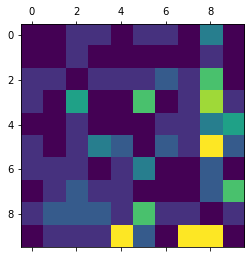

In [230]:
plt.matshow(mx_mat5)

In [234]:
mx_mat5.argmax(axis=1)

array([8, 2, 8, 8, 9, 8, 5, 9, 5, 4])

In [237]:
mx_mat5.max(axis=0)

array([0.01, 0.02, 0.04, 0.03, 0.07, 0.05, 0.02, 0.07, 0.07, 0.05])

In [236]:
mx_mat5

array([[0.  , 0.  , 0.01, 0.01, 0.  , 0.01, 0.01, 0.  , 0.03, 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.02, 0.01, 0.05, 0.  ],
       [0.01, 0.  , 0.04, 0.  , 0.  , 0.05, 0.  , 0.01, 0.06, 0.01],
       [0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.01, 0.01, 0.03, 0.04],
       [0.01, 0.  , 0.01, 0.03, 0.02, 0.  , 0.02, 0.01, 0.07, 0.02],
       [0.01, 0.01, 0.01, 0.  , 0.01, 0.03, 0.  , 0.  , 0.02, 0.  ],
       [0.  , 0.01, 0.02, 0.01, 0.01, 0.  , 0.  , 0.  , 0.02, 0.05],
       [0.01, 0.02, 0.02, 0.02, 0.01, 0.05, 0.01, 0.01, 0.  , 0.01],
       [0.  , 0.01, 0.01, 0.01, 0.07, 0.02, 0.  , 0.07, 0.07, 0.  ]])

In [249]:
cl_a, cl_b = 4, 9
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [250]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [251]:
import matplotlib as mpl

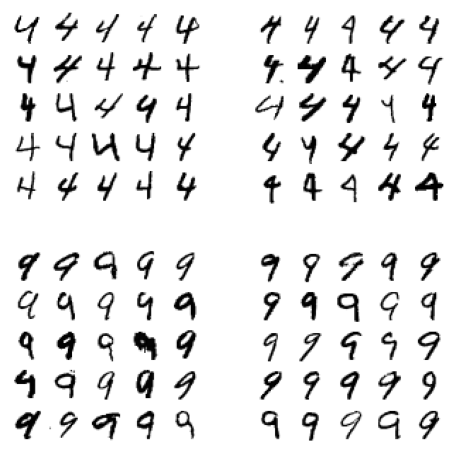

In [252]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)